# Averaging Over Different Models (Extra Simulations)
In ou paper, we considered a limited set of hyper-parameters. Hence in this jupyeter note book we provide some extra simulations trying to further investigate more set ups and scenarios. But we should mention that the topic is new and there are plenty many directions and open questions exists and we hope other researchers further study the topic to present a more comprehensive understanding.


More precisley, in our paper we presented the results for a single model, while one could ask what happens if we consider multiple models which are having different weights and biases and then attack them and report the average BLER. To address this, we also have considered 10 different models (with different weights and biases) and applied the same black-box attack on all of them. Then we present the average BLER over the 10 models. Further details is given below.

## Citing this Note Book
<div class="alert alert-block alert-danger">
<b><font size="3">Citing this notebook:</font></b>
<br>  
If you use any part of this code, please consider citing our following works:

- M. Sadeghi and E. G. Larsson, "Physical Adversarial Attacks Against End-to-End Autoencoder Communication Systems," in IEEE Communications Letters. 

- M. Sadeghi and E. G. Larsson, "Adversarial Attacks on Deep-Learning Based Radio Signal Classification," in IEEE Wireless Communications Letters.
</div>  

If you have any questions, you can contact me via m.sadeghee@gmail.com.

## Step1.  
Let us first import the required modules and set the initial values of parameters.

In [1]:
# The required modules and libraries  
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

# general parameters
k = 4
n = 7
seed = 0
ebnodbs = np.linspace(0,12,13,dtype=int) 
batch_size = 1000000 
iterations = 10

# the UAP 
with open('UAP','rb') as load_data:
    UAP = pickle.load(load_data)
    
    
# Training Parameters
train_EbNodB =  8.5 
val_EbNodB = train_EbNodB
training_params = [
    #batch_size, lr, ebnodb, iterations
    [1000    , 0.001,  train_EbNodB, 1000],
    [1000    , 0.0001, train_EbNodB, 10000],
    [10000   , 0.0001, train_EbNodB, 10000],
    [10000   , 0.00001, train_EbNodB, 10000]
]
validation_params = [
    #batch_size, ebnodb, val_steps 
    [100000, val_EbNodB, 100],
    [100000, val_EbNodB, 1000],
    [100000, val_EbNodB, 1000],
    [100000, val_EbNodB, 1000]
]

## Step 2
Now we create 10 different mmodels with different weights and biases. Then we save them.

In [2]:
# Create the Model
n=7
k=4
from All_Autoencoder_Classes import AE_CNN
p = np.zeros([1,2,n])
num_averaging_times = 10
is_training = True
dr_out = 0

for i in range(num_averaging_times):
    print('------------------ Training Model {} -------------------'.format(i))
    seed = i
    model_file_ave = 'ave_models_attacked_CNN/ae_k_{}_n_{}'.format(4,7) +'_'+ str(i)
    # create an instance
    ae_instance = AE_CNN(k,n,seed, filename=None) 
    # train it
    ae_instance.train(is_training, dr_out ,p, training_params, validation_params)
    ae_instance.save(model_file_ave) 

------------------ Training Model 0 -------------------

Batch Size: 1000, Learning Rate: 0.001, EbNodB: 8.5, Iterations: 1000
0.88822
0.00016999245
6.997585e-05
5.0008297e-05
5.0008297e-05
5.0008297e-05
6.0021877e-05
2.002716e-05
6.0021877e-05
2.002716e-05

Batch Size: 1000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
9.000301e-05
2.002716e-05
5.0008297e-05
0.0
0.0
2.002716e-05
2.9981136e-05
3.9994717e-05
2.002716e-05
6.0021877e-05

Batch Size: 10000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
1.001358e-05
2.9981136e-05
2.002716e-05
1.001358e-05
1.001358e-05
2.002716e-05
1.001358e-05
2.9981136e-05
1.001358e-05
1.001358e-05

Batch Size: 10000, Learning Rate: 1e-05, EbNodB: 8.5, Iterations: 10000
1.001358e-05
1.001358e-05
0.0
2.002716e-05
0.0
1.001358e-05
0.0
0.0
0.0
1.001358e-05
------------------ Training Model 1 -------------------

Batch Size: 1000, Learning Rate: 0.001, EbNodB: 8.5, Iterations: 1000
0.91178
9.000301e-05
6.0021877e-05
2.002716e-05
5.0008297e-05


## Step 3
Now, we will attack these 10 models and calculate the average BLER.

INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_0
model number 0 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_1
model number 1 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_2
model number 2 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_3
model number 3 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_4
model number 4 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_5
model number 5 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_6
model number 6 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_7
model number 7 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CNN/ae_k_4_n_7_8
model number 8 finished!
INFO:tensorflow:Restoring parameters from ave_models_attacked_CN

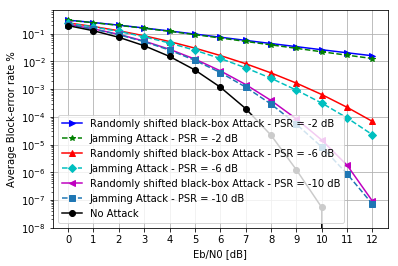

In [3]:
num_averaging_times=10
montcarlo=1000000
num_iter = 10

NoAttack = np.zeros((13,1))
rolled_2 = np.zeros((13,1)) 
jamming_2 = np.zeros((13,1))
rolled_6 = np.zeros((13,1)) 
jamming_6 = np.zeros((13,1))
rolled_10 = np.zeros((13,1)) 
jamming_10 = np.zeros((13,1))

for i in range(num_averaging_times):
    seed = i 
    _filename = 'ave_models_attacked_CNN/ae_k_{}_n_{}'.format(4,7) +'_'+ str(i)
    ae_CNN = AE_CNN(k,n,seed, filename = _filename)
    
    #########################################
    PSR_dB= -2   
    BLER_no_attack_uap_fgm2, BLER_attack_rolled_uap_fgm2, BLER_jamming1_uap_fgm2 = ae_CNN.bler_sim_attack_AWGN(False, 0, UAP.reshape(1,2,n), PSR_dB, ebnodbs, montcarlo, num_iter)
    NoAttack = NoAttack + BLER_no_attack_uap_fgm2.reshape((13,1))
    rolled_2   = rolled_2   + BLER_attack_rolled_uap_fgm2.reshape((13,1))
    jamming_2  = jamming_2  + BLER_jamming1_uap_fgm2.reshape((13,1))
    #print('i:',i,'         psr 2 finished.')
    #########################################
    PSR_dB= -6  
    BLER_no_attack_uap_fgm6, BLER_attack_rolled_uap_fgm6, BLER_jamming1_uap_fgm6 = ae_CNN.bler_sim_attack_AWGN(False, 0, UAP.reshape(1,2,n), PSR_dB, ebnodbs, montcarlo, num_iter) # 
    NoAttack = NoAttack + BLER_no_attack_uap_fgm6.reshape((13,1))
    rolled_6   = rolled_6   + BLER_attack_rolled_uap_fgm6.reshape((13,1))
    jamming_6  = jamming_6  + BLER_jamming1_uap_fgm6.reshape((13,1))
    #print('i:',i,'         psr 6 finished.')
    #########################################
    PSR_dB= -10   
    BLER_no_attack_uap_fgm10, BLER_attack_rolled_uap_fgm10, BLER_jamming1_uap_fgm10 = ae_CNN.bler_sim_attack_AWGN(False, 0, UAP.reshape(1,2,n), PSR_dB, ebnodbs, montcarlo, num_iter) # 
    NoAttack = NoAttack + BLER_no_attack_uap_fgm10.reshape((13,1))
    rolled_10   = rolled_10   + BLER_attack_rolled_uap_fgm10.reshape((13,1))
    jamming_10  = jamming_10  + BLER_jamming1_uap_fgm10.reshape((13,1))
    #print('i:',i,'         psr 10 finished.')
    
    print('model number {} finished!'.format(i))


#########################################
NoAttack = NoAttack / (3*num_averaging_times)
rolled_2   = rolled_2   / num_averaging_times
jamming_2  = jamming_2  / num_averaging_times

rolled_6   = rolled_6   / num_averaging_times
jamming_6  = jamming_6  / num_averaging_times

rolled_10   = rolled_10   / num_averaging_times
jamming_10  = jamming_10  / num_averaging_times
#########################################
ebnodbs = np.linspace(0,12,13,dtype=int)    
fig, ax = plt.subplots()
ax.plot(ebnodbs,rolled_2,'b>-',label='Randomly shifted black-box Attack - PSR = -2 dB')
ax.plot(ebnodbs,jamming_2,'g*--',label='Jamming Attack - PSR = -2 dB')
ax.plot(ebnodbs,rolled_6,'r^-',label='Randomly shifted black-box Attack - PSR = -6 dB')
ax.plot(ebnodbs,jamming_6,'cD--',label='Jamming Attack - PSR = -6 dB')
ax.plot(ebnodbs,rolled_10,'m<-',label='Randomly shifted black-box Attack - PSR = -10 dB')
ax.plot(ebnodbs,jamming_10,'s--',label='Jamming Attack - PSR = -10 dB')
ax.plot(ebnodbs,NoAttack,'ko-',label='No Attack')
plt.yscale('log')
plt.legend(loc='lower left')
plt.xticks(ebnodbs,ebnodbs)
plt.ylim(1e-8,0.7)
ax.set_xlabel('Eb/N0 [dB]')
ax.set_ylabel('Average Block-error rate %')
ax.grid(True)
plt.show()

# References
\[1\] M. Sadeghi and E. G. Larsson, "Physical Adversarial Attacks Against End-to-End Autoencoder Communication Systems," in IEEE Communications Letters.

\[2\] M. Sadeghi and E. G. Larsson, "Adversarial Attacks on Deep-Learning Based Radio Signal Classification," in IEEE Wireless Communications Letters.